# Importing the Libraries

In [1]:
# Data Manipulation Tool 
import numpy as np 
import pandas as pd

# Data Visualization Tool
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Functions
from ipywidgets import interact

# Splitting Data into Train and Test
from sklearn.model_selection import train_test_split

# Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Datasets 

## matches.csv : Having Every Match Detail from 2008 to 2019


In [2]:
matches = pd.read_csv('/content/matches.csv')

## deliveries.csv : Having Ball by Ball Detail for Every Match

In [3]:
deliveries = pd.read_csv('/content/deliveries.csv')

## Combining the Datasets

In [4]:
combined = pd.concat([matches, deliveries], axis=1, join='inner')

# Data Analysis

## Exploring the Data


### matches

In [5]:
# Top 5 Data in the Dataset
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Bottom 5 Data in the Dataset
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [7]:
# All NaN Values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
# Rows and Columns in the Dataset
matches.shape

(756, 18)

In [9]:
# Datatypes of each Column
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [10]:
# Too many NaN Values, therefore dropping this column
matches.drop('umpire3', axis=1, inplace=True)

In [11]:
# Won't be using DL, therefore dropping this column
matches.drop('dl_applied', axis=1, inplace=True)

In [12]:
# All the Column Names After Dropping 
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

### deliveries

In [13]:
# Top 5 Data in the Dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
# Bottom 5 Data in the Dataset
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [15]:
# All NaN Values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [16]:
# Rows and Columns in the Dataset
deliveries.shape

(179078, 21)

In [17]:
# Datatypes of each Column
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [18]:
# All the Column Names
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Cleaning the Data

### Filling the Values of City Based on Venue

In [19]:
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal", 
              matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", 
              matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium", 
              matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens", 
              matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali", 
              matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali", 
              matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", 
              matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", 
              matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", 
              matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", 
              matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", 
              matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium", 
              matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", 
              matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium", 
              matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", 
              matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium", 
              matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",
              matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",
              matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground", 
              matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium", 
              matches["venue"] == "IS Bindra Stadium", 
              matches["venue"] == "ACA-VDCA Stadium"]

values = ['Hyderabad', 'Mumbai', 'Rajkot', "Indore", "Bengaluru", "Mumbai", "Kolkata", "Delhi",
          "Mohali", "Kanpur", "Mohali", "Pune", "Jaipur", "Chennai", "Cape Town", "Port Elizabeth",
          "Durban", "Centurion", 'Eastern Cape', 'Johannesburg', 'Northern Cape', 'Bloemfontein',
          'Mumbai', 'Ahmedabad', 'Cuttack', 'Jamtha', 'Dharamshala', 'Chennai', 'Visakhapatnam',
          'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Dubai', 'Chennai', 'Delhi',
          'Bengaluru', 'Hyderabad', 'Mohali', 'Visakhapatnam']

matches['city'] = np.where(matches['city'].isnull(), np.select(conditions, values), matches['city'])

### Removing Records Having Null Values in "umpire" Column

In [20]:
matches = matches[matches['umpire1'].notna()]
matches = matches[matches['umpire2'].notna()]

### Replacing Null Values With 'Draw' in "winner" Column

In [21]:
matches['winner'].fillna('Draw', inplace = True)

### Replacing 'Rising Pune Supergiant' with 'Rising Pune Supergiants'



In [22]:
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

### Replacing 'Delhi Daredevils' with 'Delhi Capitals'

In [23]:
matches["team1"]=matches["team1"].replace("Delhi Daredevils", "Delhi Capitals")
matches["team2"]=matches["team2"].replace("Delhi Daredevils", "Delhi Capitals")
matches["winner"]=matches["winner"].replace("Delhi Daredevils", "Delhi Capitals")
matches["toss_winner"]=matches["toss_winner"].replace("Delhi Daredevils", "Delhi Capitals")

### Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad'

In [24]:
matches["team1"]=matches["team1"].replace("Deccan Chargers", "Sunrisers Hyderabad")
matches["team2"]=matches["team2"].replace("Deccan Chargers", "Sunrisers Hyderabad")
matches["winner"]=matches["winner"].replace("Deccan Chargers", "Sunrisers Hyderabad")
matches["toss_winner"]=matches["toss_winner"].replace("Deccan Chargers", "Sunrisers Hyderabad")

### Replacing 'Bangalore' with 'Bengaluru'

In [25]:
matches['city'] = matches['city'].replace(('Bangalore'), ('Bengaluru'))
combined['city'] = combined['city'].replace(('Bangalore'), ('Bengaluru'))

## All Unique Teams After Cleaning

In [26]:
for i in matches['team1'].unique():
  print(i)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiants
Kolkata Knight Riders
Royal Challengers Bangalore
Delhi Capitals
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Kochi Tuskers Kerala
Pune Warriors


## All Unique Cities After Cleaning

In [27]:
for i in matches['city'].unique():
  print(i)

Hyderabad
Pune
Rajkot
Indore
Mumbai
Kolkata
Bengaluru
Delhi
Chandigarh
Kanpur
Jaipur
Chennai
Cape Town
Port Elizabeth
Durban
Centurion
East London
Johannesburg
Kimberley
Bloemfontein
Ahmedabad
Cuttack
Nagpur
Dharamsala
Kochi
Visakhapatnam
Raipur
Ranchi
Abu Dhabi
Sharjah
Dubai
Mohali


## Checking for NaN Values

In [28]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

## Total Number of Cities and Venues Associated with IPL Matches

In [29]:
print("Total number of Teams : ", combined['team1'].nunique())
print("Total number of Seaons : ", combined['season'].nunique())
print("Total number of Cities : ", combined['city'].nunique())
print("Total number of Venues : ", combined['venue'].nunique())

Total number of Teams :  15
Total number of Seaons :  12
Total number of Cities :  31
Total number of Venues :  41


## Total Matches Played, Cities and Venues Played At and All the Team Names

In [30]:
print("Total Matches Played : ", matches.shape[0])
print("\nCities played at : ", matches['city'].unique())
print("\nVenues played at : ", matches['venue'].unique())
print("\nAll teams : ", matches['team1'].unique())


Total Matches Played :  754

Cities played at :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bengaluru'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali']

Venues played at :  ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'Wankhede Stadium' 'Eden Gardens' 'M Chinnaswamy Stadium'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance 

## Matches Played Across Each Season

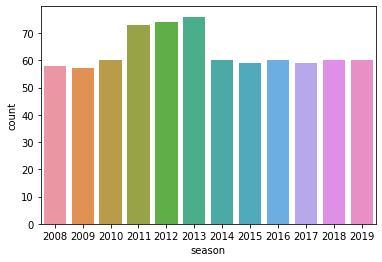

In [31]:
sns.countplot(x=combined['season'])

## Matches Played in Each Stadium by Popularity


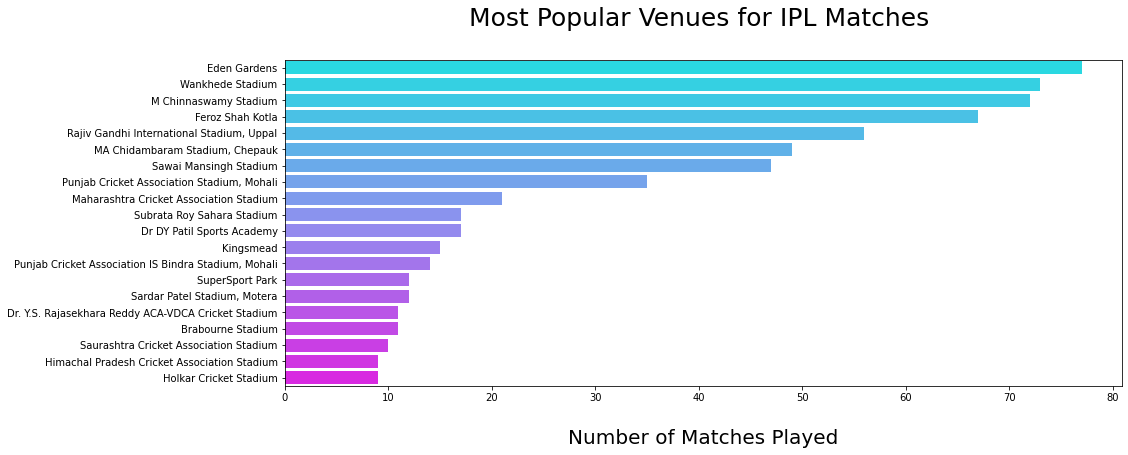

In [32]:
plt.figure(figsize=(15, 6))
sns.barplot(y = matches['venue'].value_counts().head(20).index,
            x = matches['venue'].value_counts().head(20).values,
            palette = 'cool')
plt.title('Most Popular Venues for IPL Matches \n', fontsize=25)
plt.xlabel('\nNumber of Matches Played', fontsize=20)
plt.show()

## Most Man of the Match Awards 

In [33]:
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
S Sreesanth        1
B Stanlake         1
MF Maharoof        1
L Ngidi            1
RJ Harris          1
Name: player_of_match, Length: 226, dtype: int64

## All the Matches Where 'Chris Gayle' Won the Man of the Match

In [34]:
matches[matches['player_of_match'] == 'CH Gayle'][['date', 'team1', 'team2', 'winner']].reset_index(drop=True)

,date,team1,team2,winner
0,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore
1,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
2,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
3,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore
4,2011-05-08,Kochi Tuskers Kerala,Royal Challengers Bangalore,Royal Challengers Bangalore
5,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
6,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore
7,2011-05-27,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
8,2012-04-17,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore
9,2012-04-20,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore


## Maximum Win by Runs

In [35]:
matches[matches['win_by_runs'] == matches['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


## Maximum Win by Wickets

In [36]:
matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bengaluru,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


## Perfomance of the Top 3 Teams Having a Huge Fan Following 

In [37]:
MI = matches[(matches['team1'] == 'Mumbai Indians') | (matches['team2'] == 'Mumbai Indians')]
CSK = matches[(matches['team1'] == 'Chennai Super Kings') | (matches['team2'] == 'Chennai Super Kings')]
RCB = matches[(matches['team1'] == 'Royal Challengers Bangalore') | (matches['team2'] == 'Royal Challengers Bangalore')]

data = MI.append(CSK)
data = data.append(RCB)
data = data[(data['winner'] == 'Mumbai Indians') | (data['winner'] == 'Chennai Super Kings') | (data['winner'] == 'Royal Challengers Bangalore')]

data[['season',  
      'winner', 
      'win_by_runs', 
      'win_by_wickets', 
      'player_of_match']].groupby(['winner']).agg(['min', 
                                                   'max', 
                                                   'sum', 
                                                   'mean']).style.background_gradient(cmap='inferno')

## Probability of a Team to Win if they Choose to Field or Bat

In [38]:
matches['toss_decision'].value_counts()

field    462
bat      292
Name: toss_decision, dtype: int64

In [39]:
field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']

print("Chances of winning the match when toss decision is 'field' : ", round(field.shape[0]/matches.shape[0],2)*100)
print("Chances of winning the match when toss decision is 'bat' : ", round(bat.shape[0]/matches.shape[0],2)*100)

Chances of winning the match when toss decision is 'field' :  61.0
Chances of winning the match when toss decision is 'bat' :  39.0


## Records Where a Team Won After Batting First

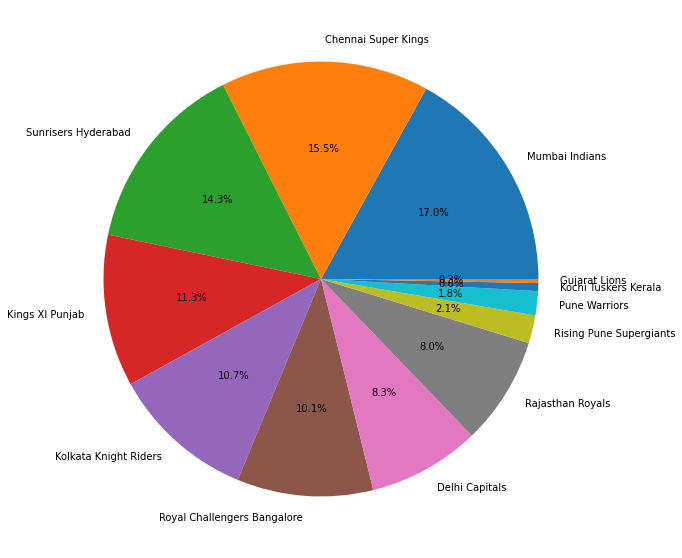

In [40]:
batting_first = matches[matches['win_by_runs'] != 0]

plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

## Records Where a Team Won After Batting Second

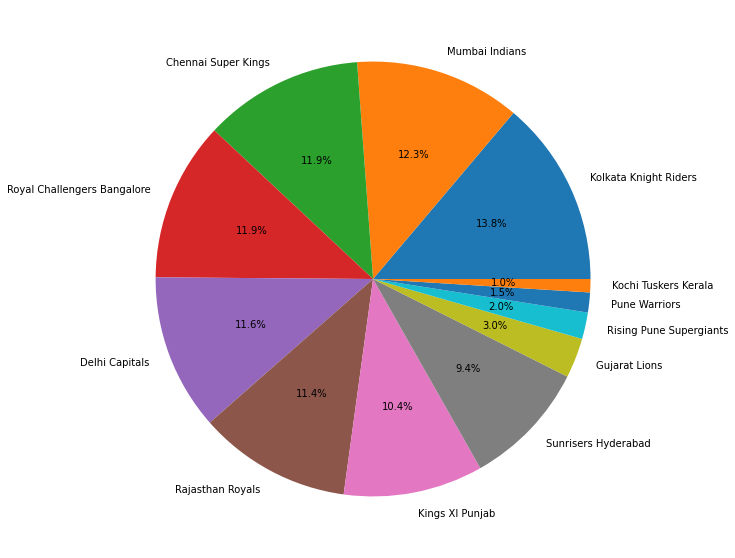

In [41]:
batting_second=matches[matches['win_by_wickets'] != 0]

plt.figure(figsize=(10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

## Maximum Toss Winners

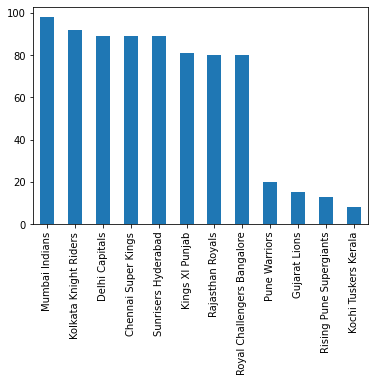

In [42]:
matches['toss_winner'].value_counts().plot(kind='bar')

## Decision after toss across seasons

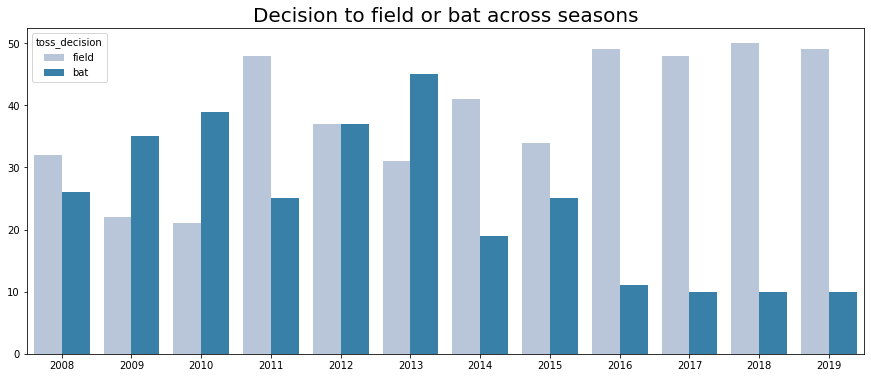

In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(matches['season'].sort_values(), hue=matches['toss_decision'], palette='PuBu')
plt.title('Decision to field or bat across seasons', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

## Decision of each IPL Team after Winning the Toss

In [44]:
@interact
def toss_decision(team = list(matches['toss_winner'].value_counts().index)):
  x = matches[matches['toss_winner'] == team]
  return x['toss_decision'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kolkata Knight Riders', 'Delhi …

## Understanding the Match Results

In [45]:
matches['result'].value_counts()

normal       741
tie            9
no result      4
Name: result, dtype: int64

In [46]:
normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']

print("Percentage of matches where result is normal : ", round(normal.shape[0]/matches.shape[0], 2)*100)
print("Percentage of matches where result is tie : ", round(tie.shape[0]/matches.shape[0], 2)*100)

Percentage of matches where result is normal :  98.0
Percentage of matches where result is tie :  1.0


## Total Wins Per Team

In [47]:
wins = pd.DataFrame({'Total_Matches_Played' : matches['team1'].value_counts() + matches['team2'].value_counts(),
                     'Total_Wins' : matches['winner'].value_counts()})

In [48]:
wins['Win%'] = ((wins['Total_Wins']/wins['Total_Matches_Played'])*100).round(2)

In [49]:
wins

,Total_Matches_Played,Total_Wins,Win%
Chennai Super Kings,164.0,100,60.98
Delhi Capitals,175.0,76,43.43
Draw,NaN,4,NaN
Gujarat Lions,30.0,13,43.33
Kings XI Punjab,176.0,82,46.59
Kochi Tuskers Kerala,14.0,6,42.86
Kolkata Knight Riders,178.0,92,51.69
Mumbai Indians,187.0,109,58.29
Pune Warriors,46.0,12,26.09
Rajasthan Royals,147.0,75,51.02


## Probabilty for a Team to Win if they Win the Toss 

In [50]:
same = matches[matches['toss_winner'] == matches['winner']]
not_same = matches[matches['toss_winner'] != matches['winner']]

print("The percentage of matches where toss winner is same as winner : ", round(same.shape[0]/matches.shape[0],2)*100)
print("The percentage of matches where toss winner is not same as winner : ", round(not_same.shape[0]/matches.shape[0],2)*100)

The percentage of matches where toss winner is same as winner :  52.0
The percentage of matches where toss winner is not same as winner :  48.0


## Most Lucky Grounds for Teams

In [51]:
@interact
def lucky(team_name = list(matches['team1'].value_counts().index)):
  values =  matches[matches['winner'] == team_name][['city', 'venue']].value_counts().nlargest(5)
  return values

interactive(children=(Dropdown(description='team_name', options=('Sunrisers Hyderabad', 'Mumbai Indians', 'Kin…

## Comparison Between 2 Teams Based on their Wins

In [52]:
def comparison(team1, team2):
  compare = combined[((combined['team1'] == team1)|(combined['team2'] == team1))&((combined['team1'] == team2)|(combined['team2'] == team2))]
  sns.countplot(x='season', hue='winner', data=compare)

In [53]:
combined.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

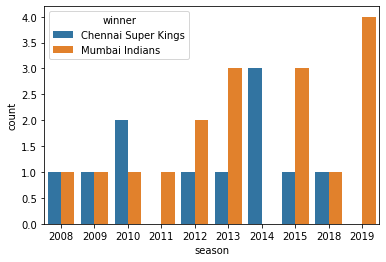

In [54]:
comparison('Mumbai Indians', 'Chennai Super Kings')

# Machine Learning

## Data Encoding

In [55]:
df = matches[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'winner', 'venue']].copy()

In [56]:
df.replace({'team1': {'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Sunrisers Hyderabad':5,
                    'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Capitals':8,'Kochi Tuskers Kerala':9,
                    'Rising Pune Supergiants':10,'Gujarat Lions':11,'Pune Warriors':12}, 
            
            'team2': {'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Sunrisers Hyderabad':5,
                   'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Capitals':8,'Kochi Tuskers Kerala':9,
                   'Rising Pune Supergiants':10,'Gujarat Lions':11,'Pune Warriors':12},
            
            'toss_winner': {'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Sunrisers Hyderabad':5,
                         'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Capitals':8,'Kochi Tuskers Kerala':9,
                         'Rising Pune Supergiants':10,'Gujarat Lions':11,'Pune Warriors':12},
            
            'toss_decision' : {'field' : 0, 'bat' : 1},
            
            'winner': {'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Sunrisers Hyderabad':5,
                     'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Capitals':8,'Kochi Tuskers Kerala':9,
                     'Rising Pune Supergiants':10,'Gujarat Lions':11,'Pune Warriors':12,'Draw':13}}, inplace=True)


In [57]:
label_encoder = preprocessing.LabelEncoder()

In [58]:
df['city']= label_encoder.fit_transform(df['city'])
df['venue']= label_encoder.fit_transform(df['venue'])

In [59]:
df.head()

,team1,team2,city,toss_winner,toss_decision,winner,venue
0,5,7,14,7,0,5,28
1,4,10,26,10,0,10,21
2,11,1,28,1,0,1,31
3,10,6,15,6,0,6,13
5,11,5,14,5,0,5,28


In [60]:
df.dtypes

team1            int64
team2            int64
city             int64
toss_winner      int64
toss_decision    int64
winner           int64
venue            int64
dtype: object

In [61]:
X = df[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'venue']].values
y = df['winner'].values

## Preporcessing the Data

In [62]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
sc_x= StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

## Training the Model

In [65]:
xgb = XGBClassifier(learning_rate = 0.05,
                    n_estimators=10,
                    max_depth=10,
                    nthread=5,
                    n_jobs=1,
                    random_state=1
                    )

In [66]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=5, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predicting Winners

In [67]:
y_pred = xgb.predict(X_test)

## Displaying Accuracy

In [68]:
xgb.score(X_test, y_test)

0.6084656084656085